In [1]:
import numpy as np
import pandas as pd

from scipy.stats import norm

from src.series import ControlledInterventionSeries

In [2]:
"""
Forging some test data
"""

n = 100
split = int(n / 2)

control_series = pd.Series(norm(loc=10, scale=.5).rvs(n))
series = norm(loc=11, scale=.5).rvs(n)

series = pd.Series((series) + np.concatenate([np.zeros(split), np.ones(n - split) * .3]))

experiment = ControlledInterventionSeries(
    series, control_series, split
)

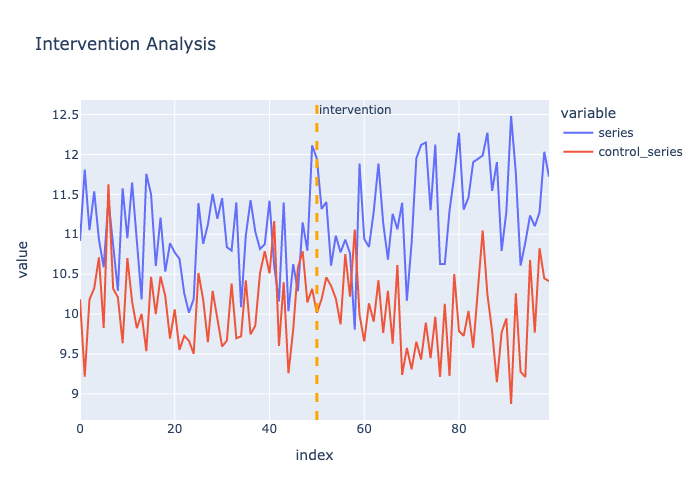

In [3]:
"""
Result is random noise with increase in mean after the intervention
"""
import plotly.io as pio
pio.renderers.default = "png"

experiment.plot()

In [4]:
"""
The report gives on overview of means and the results of different methods of Hypothesis testing
"""

experiment.report()


___________________
Data Statistics

The means of series before and after intervention are
	Before: 10.950434731880854, After: 11.35359950471546

The means of control-series before and after intervention are
	Before: 10.106635598758281, After: 9.96446014035405

The mean difference of the series and control-series before and after is
	Before: 0.8437991331225732, After: 1.389139364361412.
___________________
Results from ttest:

The p-values for significance of differences in means before and after intervention are
	Series: 0.0004300602547174972, Control Series: 0.15828183031723558, Difference: 0.00032872559792903585.

___________________
Rsults from ANCOVA:

           Source         SS  DF          F     p-unc       np2
0    intervention   4.091516   1  13.257660  0.000438  0.120243
1  control_series   0.037146   1   0.120363  0.729393  0.001239
2        Residual  29.935682  97        NaN       NaN       NaN
        


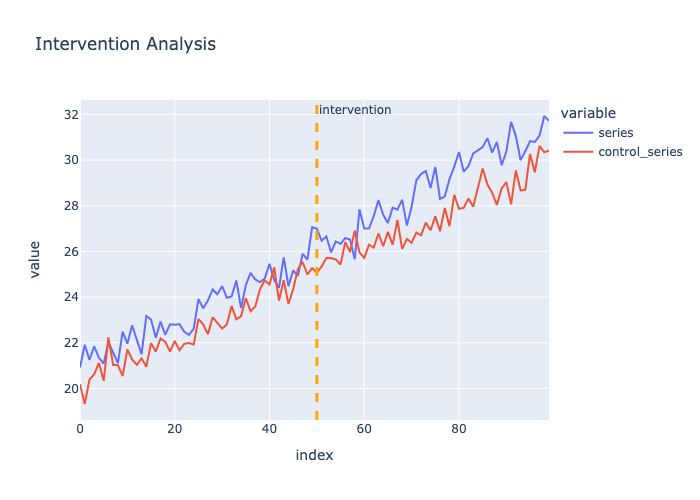

In [5]:
"""
Adding trend to the test data
"""

trend = np.linspace(10, 20, n)

series_trend = series + trend
control_series_trend = control_series + trend

experiment_trend = ControlledInterventionSeries(
    series_trend, control_series_trend, split
)

experiment_trend.plot()

In [6]:
experiment_trend.report()


___________________
Data Statistics

The means of series before and after intervention are
	Before: 23.425182206628328, After: 28.87885202996798

The means of control-series before and after intervention are
	Before: 22.581383073505748, After: 27.48971266560657

The mean difference of the series and control-series before and after is
	Before: 0.8437991331225727, After: 1.389139364361412.
___________________
Results from ttest:

The p-values for significance of differences in means before and after intervention are
	Series: 1.4492669917728638e-30, Control Series: 3.1605748283986576e-29, Difference: 0.00032872559792903195.

___________________
Rsults from ANCOVA:

           Source          SS  DF           F         p-unc       np2
0    intervention    4.210423   1    7.849194  6.138397e-03  0.074862
1  control_series  206.891138   1  385.692512  1.430408e-35  0.799044
2        Residual   52.032227  97         NaN           NaN       NaN
        


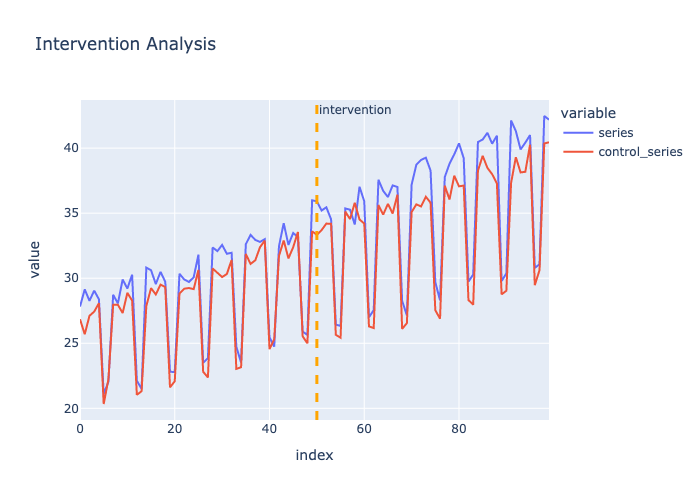

In [7]:
"""
Adding season to the test data
"""

cycle = np.array([1, 1, 1, 1, 1, 0, 0,])
season_flag = np.tile(cycle, int(n / len(cycle) + 1))[:n]
season_multiplier = season_flag * .33 + 1


series_season = series_trend * season_multiplier
control_series_season = control_series_trend * season_multiplier

experiment_season = ControlledInterventionSeries(
    series_season, control_series_season, split
)

experiment_season.plot()

In [8]:
experiment_season.report()


___________________
Data Statistics

The means of series before and after intervention are
	Before: 28.979509667775684, After: 35.750572846003315

The means of control-series before and after intervention are
	Before: 27.918844106177907, After: 34.02167898286207

The mean difference of the series and control-series before and after is
	Before: 1.0606655615977743, After: 1.7288938631412527.
___________________
Results from ttest:

The p-values for significance of differences in means before and after intervention are
	Series: 1.4891817257349044e-11, Control Series: 5.0363183314083493e-11, Difference: 0.0007840792551690025.

___________________
Rsults from ANCOVA:

           Source           SS  DF            F         p-unc       np2
0    intervention     2.230629   1     2.483787  1.182810e-01  0.024967
1  control_series  1838.265426   1  2046.893479  5.156500e-67  0.954755
2        Residual    87.113349  97          NaN           NaN       NaN
        


In [9]:
"""
Same with adding season flag as covariate for ANCOVA
"""

ControlledInterventionSeries(
    series_season, control_series_season, split, covariates=[season_flag]
).report()


___________________
Data Statistics

The means of series before and after intervention are
	Before: 28.979509667775684, After: 35.750572846003315

The means of control-series before and after intervention are
	Before: 27.918844106177907, After: 34.02167898286207

The mean difference of the series and control-series before and after is
	Before: 1.0606655615977743, After: 1.7288938631412527.
___________________
Results from ttest:

The p-values for significance of differences in means before and after intervention are
	Series: 1.4891817257349044e-11, Control Series: 5.0363183314083493e-11, Difference: 0.0007840792551690025.

___________________
Rsults from ANCOVA:

           Source          SS  DF           F         p-unc       np2
0    intervention    5.620568   1    6.445714  1.272954e-02  0.062918
1  control_series  344.125371   1  394.645858  8.872190e-36  0.804340
2     covariate_0    3.402764   1    3.902318  5.109101e-02  0.039061
3        Residual   83.710585  96         NaN  

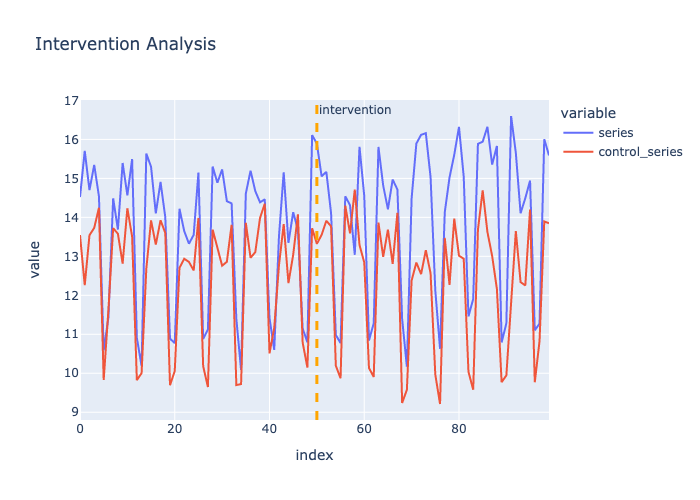

In [10]:
"""
Only season, no trend
"""

series_season_only = series * season_multiplier
control_series_season_only = control_series * season_multiplier

experiment_season_only = ControlledInterventionSeries(
    series_season_only, control_series_season_only, split
)

experiment_season_only.plot()

In [11]:
experiment_season_only.report()


___________________
Data Statistics

The means of series before and after intervention are
	Before: 13.559428859694876, After: 14.070653654084124

The means of control-series before and after intervention are
	Before: 12.4987632980971, After: 12.34175979094287

The mean difference of the series and control-series before and after is
	Before: 1.0606655615977747, After: 1.7288938631412532.
___________________
Results from ttest:

The p-values for significance of differences in means before and after intervention are
	Series: 0.18171521737622506, Control Series: 0.6304639190133068, Difference: 0.0007840792551690064.

___________________
Rsults from ANCOVA:

           Source          SS  DF           F         p-unc       np2
0    intervention   11.172890   1   11.906587  8.297694e-04  0.109328
1  control_series  262.906508   1  280.170939  2.327082e-30  0.742822
2        Residual   91.022757  97         NaN           NaN       NaN
        


In [12]:
"""
Same with adding season flag as covariate
"""

ControlledInterventionSeries(
    series_season_only, control_series_season_only, split, covariates=[season_flag]
).report()


___________________
Data Statistics

The means of series before and after intervention are
	Before: 13.559428859694876, After: 14.070653654084124

The means of control-series before and after intervention are
	Before: 12.4987632980971, After: 12.34175979094287

The mean difference of the series and control-series before and after is
	Before: 1.0606655615977747, After: 1.7288938631412532.
___________________
Results from ttest:

The p-values for significance of differences in means before and after intervention are
	Series: 0.18171521737622506, Control Series: 0.6304639190133068, Difference: 0.0007840792551690064.

___________________
Rsults from ANCOVA:

           Source         SS  DF          F         p-unc       np2
0    intervention   6.477877   1  13.090860  4.756228e-04  0.120000
1  control_series   0.005867   1   0.011856  9.135200e-01  0.000123
2     covariate_0  43.518146   1  87.943929  3.230859e-15  0.478102
3        Residual  47.504610  96        NaN           NaN       